In [1]:
import sys
print(sys.executable)


C:\Users\reshm\anaconda3\envs\myenv\python.exe


In [2]:
#Handwritten Digit Recognizer Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [3]:
#Loading Datasets
import zipfile

with zipfile.ZipFile(r"C:\Users\reshm\Downloads\digit-recognizer.zip", 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\reshm\Downloads\digit-recognizer")


In [4]:
#Read the train.csv
train_df=pd.read_csv(r"C:\Users\reshm\Downloads\digit-recognizer\train.csv")

In [5]:
print("Dataset Shape:", train_df.shape)
print(train_df.head())

Dataset Shape: (42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0 

In [6]:
# Separate Features and Labels
X=train_df.drop("label", axis=1).values # Pixel values
y=train_df["label"].values              # Labels(0-9)

In [7]:
#Normalize Pixel values
X =X/255.0 # Scale pixels to range[0,1]

In [8]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training samples: 33600
Testing Samples: 8400


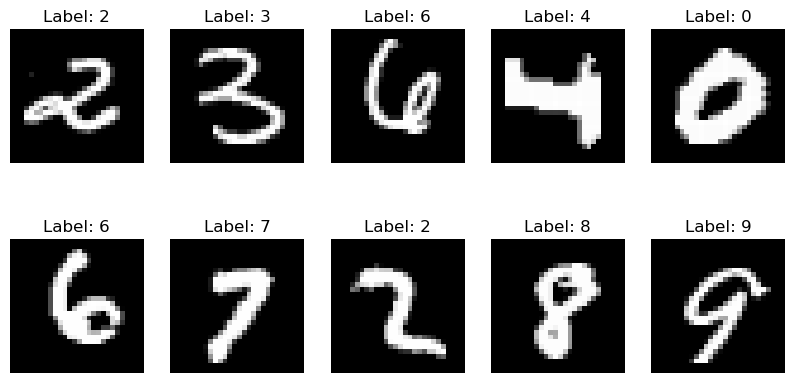

In [9]:
#Visualizing Digits
fig, axes =plt.subplots(2,5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28),cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()    

In [10]:
#training Models
print("Training Logistic Regression Model...")
model = LogisticRegression(max_iter=500, solver='saga')
model.fit(X_train, y_train)

Training Logistic Regression Model...


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,500
,multi_class,'deprecated'


In [13]:
# Evaluating Model
y_pred = model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nModel Performance:")
print(".....................")
print("Accuracy:", accuracy)
print("F1 Score:",f1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Model Performance:
.....................
Accuracy: 0.9128571428571428
F1 Score: 0.9126117567052553

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       827
           1       0.93      0.98      0.95       937
           2       0.91      0.90      0.91       835
           3       0.90      0.88      0.89       870
           4       0.92      0.91      0.91       814
           5       0.87      0.86      0.86       759
           6       0.95      0.96      0.96       827
           7       0.93      0.93      0.93       880
           8       0.88      0.85      0.86       813
           9       0.88      0.90      0.89       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



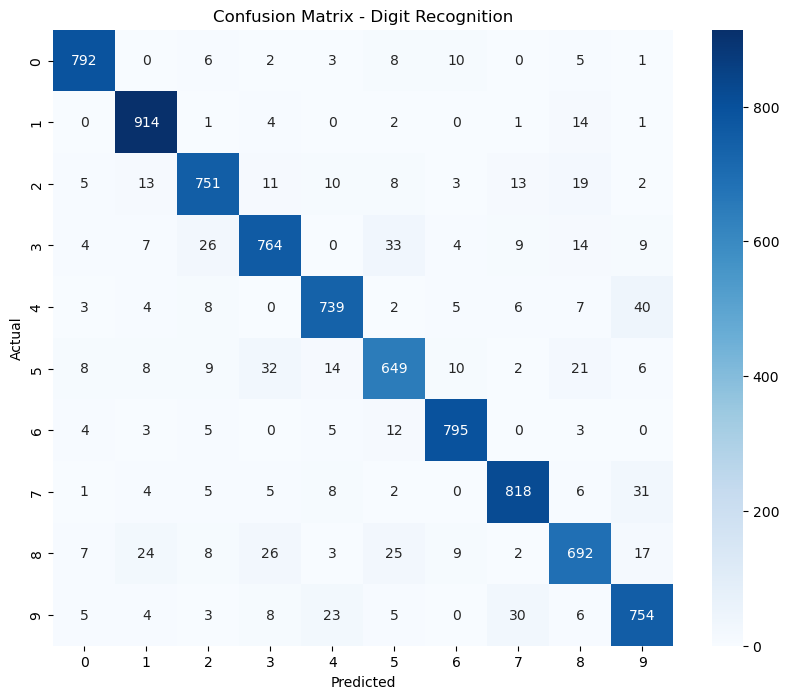

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Digit Recognition")
plt.show()            


Numbers of Misclassified Digits: 732


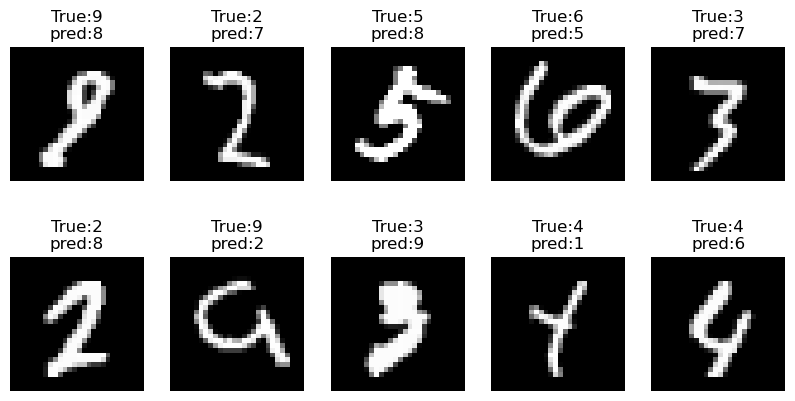

In [17]:
#Visualizing Misclassified Digits
misclassified_idx =np.where(y_test!=y_pred)[0]
print("\nNumbers of Misclassified Digits:", len(misclassified_idx))
# first 10 Misclassified examples
fig, axes = plt.subplots(2,5, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    idx = misclassified_idx[i]
    ax.imshow(X_test[idx].reshape(28,28), cmap='grey')
    ax.set_title(f"True:{y_test[idx]}\npred:{y_pred[idx]}")
    ax.axis("off")
plt.show()    
    
    